In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

df = pd.read_csv("data.csv", nrows=400000)
print("\nTop 'source' values:")
print(df["source"].value_counts().head(20))


Top 'source' values:
source
Human                       243488
GPT-3.5                      52346
Flan-T5-Base                  9201
Flan-T5-Large                 9164
Flan-T5-Small                 9144
Flan-T5-XXL                   9113
GLM-130B                      9071
Flan-T5-XL                    8986
GPT-4                         8852
Bloom-7B                      8812
GPT-J                         7580
Claude-Instant-v1             7147
GPT-NeoX                      6821
Falcon-180B                   4745
Claude-v1                     3158
Goliath-120B                   734
Gemini-Pro                     613
Dolphin-Mixtral-8x7B           407
Cohere-Command                 390
Dolphin-2.5-Mixtral-8x7B       228
Name: count, dtype: int64


In [24]:
df["text"] = df["text"].astype(str)
df["word_count"] = df["text"].str.split().str.len()
df_gpt = df[df["source"].str.contains("gpt-3.5", case=False, na=False)].copy()
df_human = df[df["source"].str.lower() == "Human"].copy()

print("GPT-3.5 rows in sample:", len(df_gpt))
print("Human rows in sample:", len(df_human))

GPT-3.5 rows in sample: 52346
Human rows in sample: 0


INTRODUCTION:
In this section, I will explore the subset of the Human vs. LLM Text Corpus generated by GPT-3.5, using the source column to filter all texts labeled as GPT-3.5. The goal in doing this is to identify language patterns, stylistic tendencies, and structural features that characterize GPT-3.5 outputs, and then compare these traits to human-written texts in the dataset. In analyzing word-count distributions, vocabulary usage, and length comparisons, the visualizations highlight clear differences in how GPT-3.5 responds relative to human authors. These insights help reveal the model’s writing behaviors, consistency, and linguistic signatures.

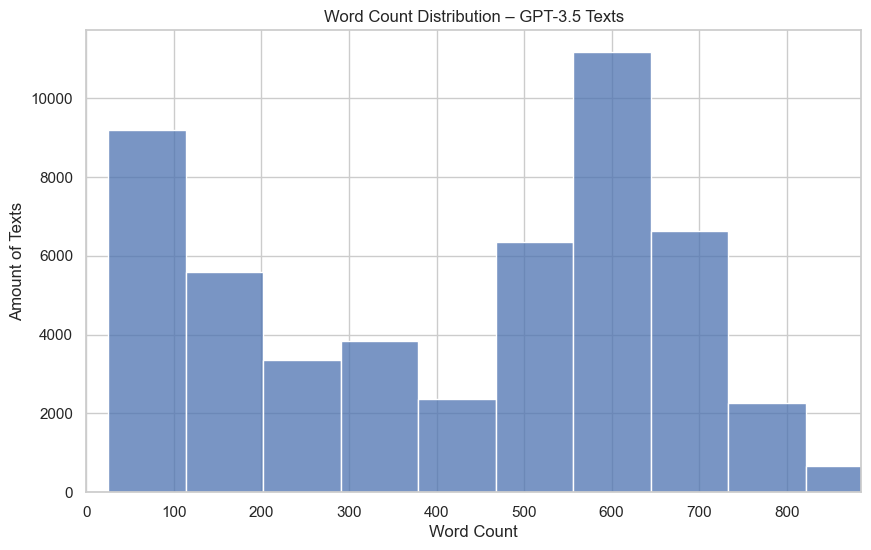

In [26]:
plt.figure()
sns.histplot(df_gpt["word_count"], bins=40)
plt.xlim(0, df_gpt["word_count"].quantile(0.98))
plt.xlabel("Word Count")
plt.ylabel("Amount of Texts")
plt.title("Word Count Distribution – GPT-3.5 Texts")
plt.show()

Figure 1: This histogram shows the distribution of text lengths produced by GPT-3.5. Most outputs fall within a concentrated mid-range of word counts, suggesting that GPT-3.5 tends to generate responses of consistent length regardless of prompt variability.

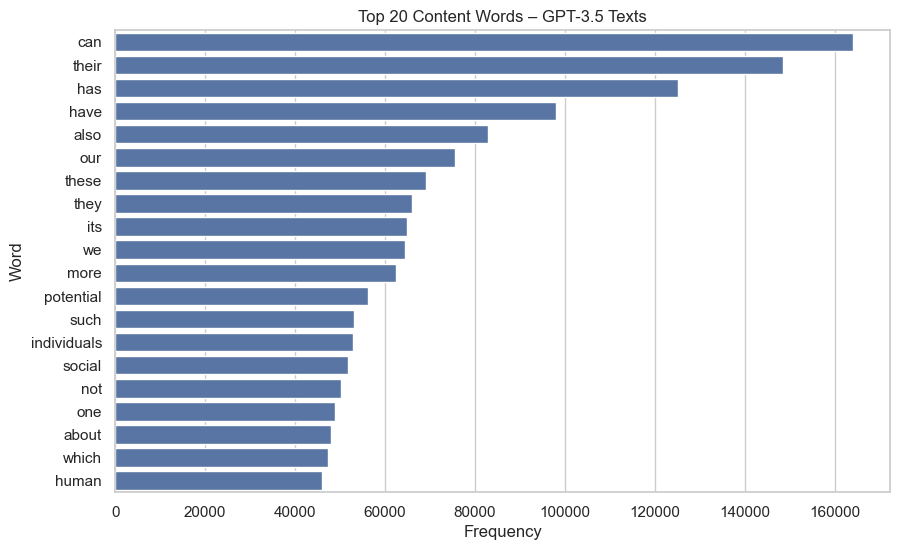

In [27]:
all_words = []
for t in df_gpt["text"]:
    tokens = t.lower().split()
    all_words.extend(tokens)

stop_words = {
    "the","a","an","and","or","to","of","in","for","on","is","it","that","this",
    "with","as","by","be","are","was","were","at","from","you","your"
}

filtered = [w for w in all_words if w.isalpha() and w not in stop_words]

word_counts = Counter(filtered)
top_words = word_counts.most_common(20)

words = [w for w, c in top_words]
counts = [c for w, c in top_words]

plt.figure()
sns.barplot(x=counts, y=words)
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.title("Top 20 Content Words – GPT-3.5 Texts")
plt.show()

Figure 2: This bar chart displays the most common non-stop-words in GPT-3.5 outputs. The recurring vocabulary indicates the model’s stylistic preferences and reveals dominant themes that GPT-3.5 frequently discusses across diverse prompts.

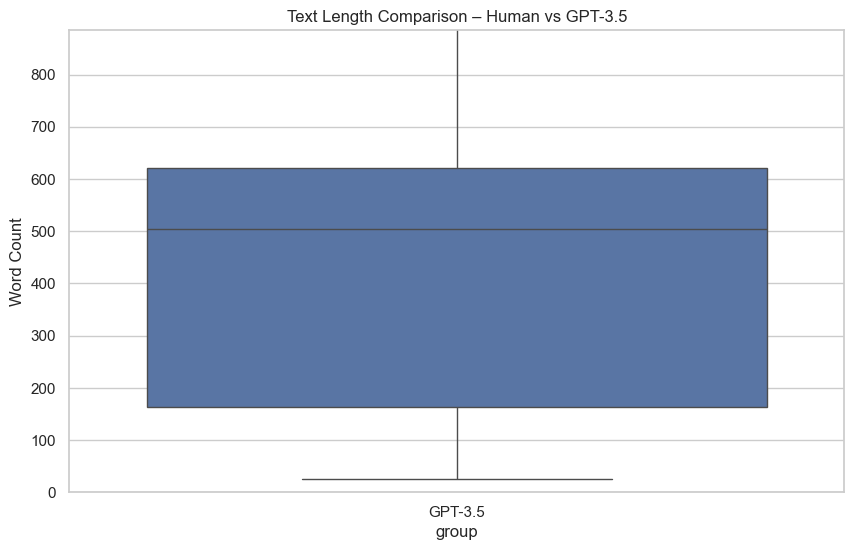

In [28]:
df_gpt_plot = df_gpt.copy()
df_human_plot = df_human.copy()

df_gpt_plot["group"] = "GPT-3.5"
df_human_plot["group"] = "Human"

df_compare = pd.concat([df_gpt_plot, df_human_plot], ignore_index=True)

plt.figure()
sns.boxplot(data=df_compare, x="group", y="word_count")
plt.ylim(0, df_compare["word_count"].quantile(0.98))
plt.ylabel("Word Count")
plt.title("Text Length Comparison – Human vs GPT-3.5")
plt.show()

Figure 3: This boxplot compares the text lengths of human-written and GPT-3.5-generated responses. GPT-3.5 exhibits a narrower and more consistent range of word counts, while human texts display greater variability, highlighting differences in verbosity, style, and writing flexibility